In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [62]:
#loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv(r'C:\Users\Lenovo\Desktop\codsoft\creditcard.csv')

In [63]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
credit_card_data.shape

(284807, 31)

In [65]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [66]:
#dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [67]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [68]:
#distribution of legit transaction & fraudulent transaction
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

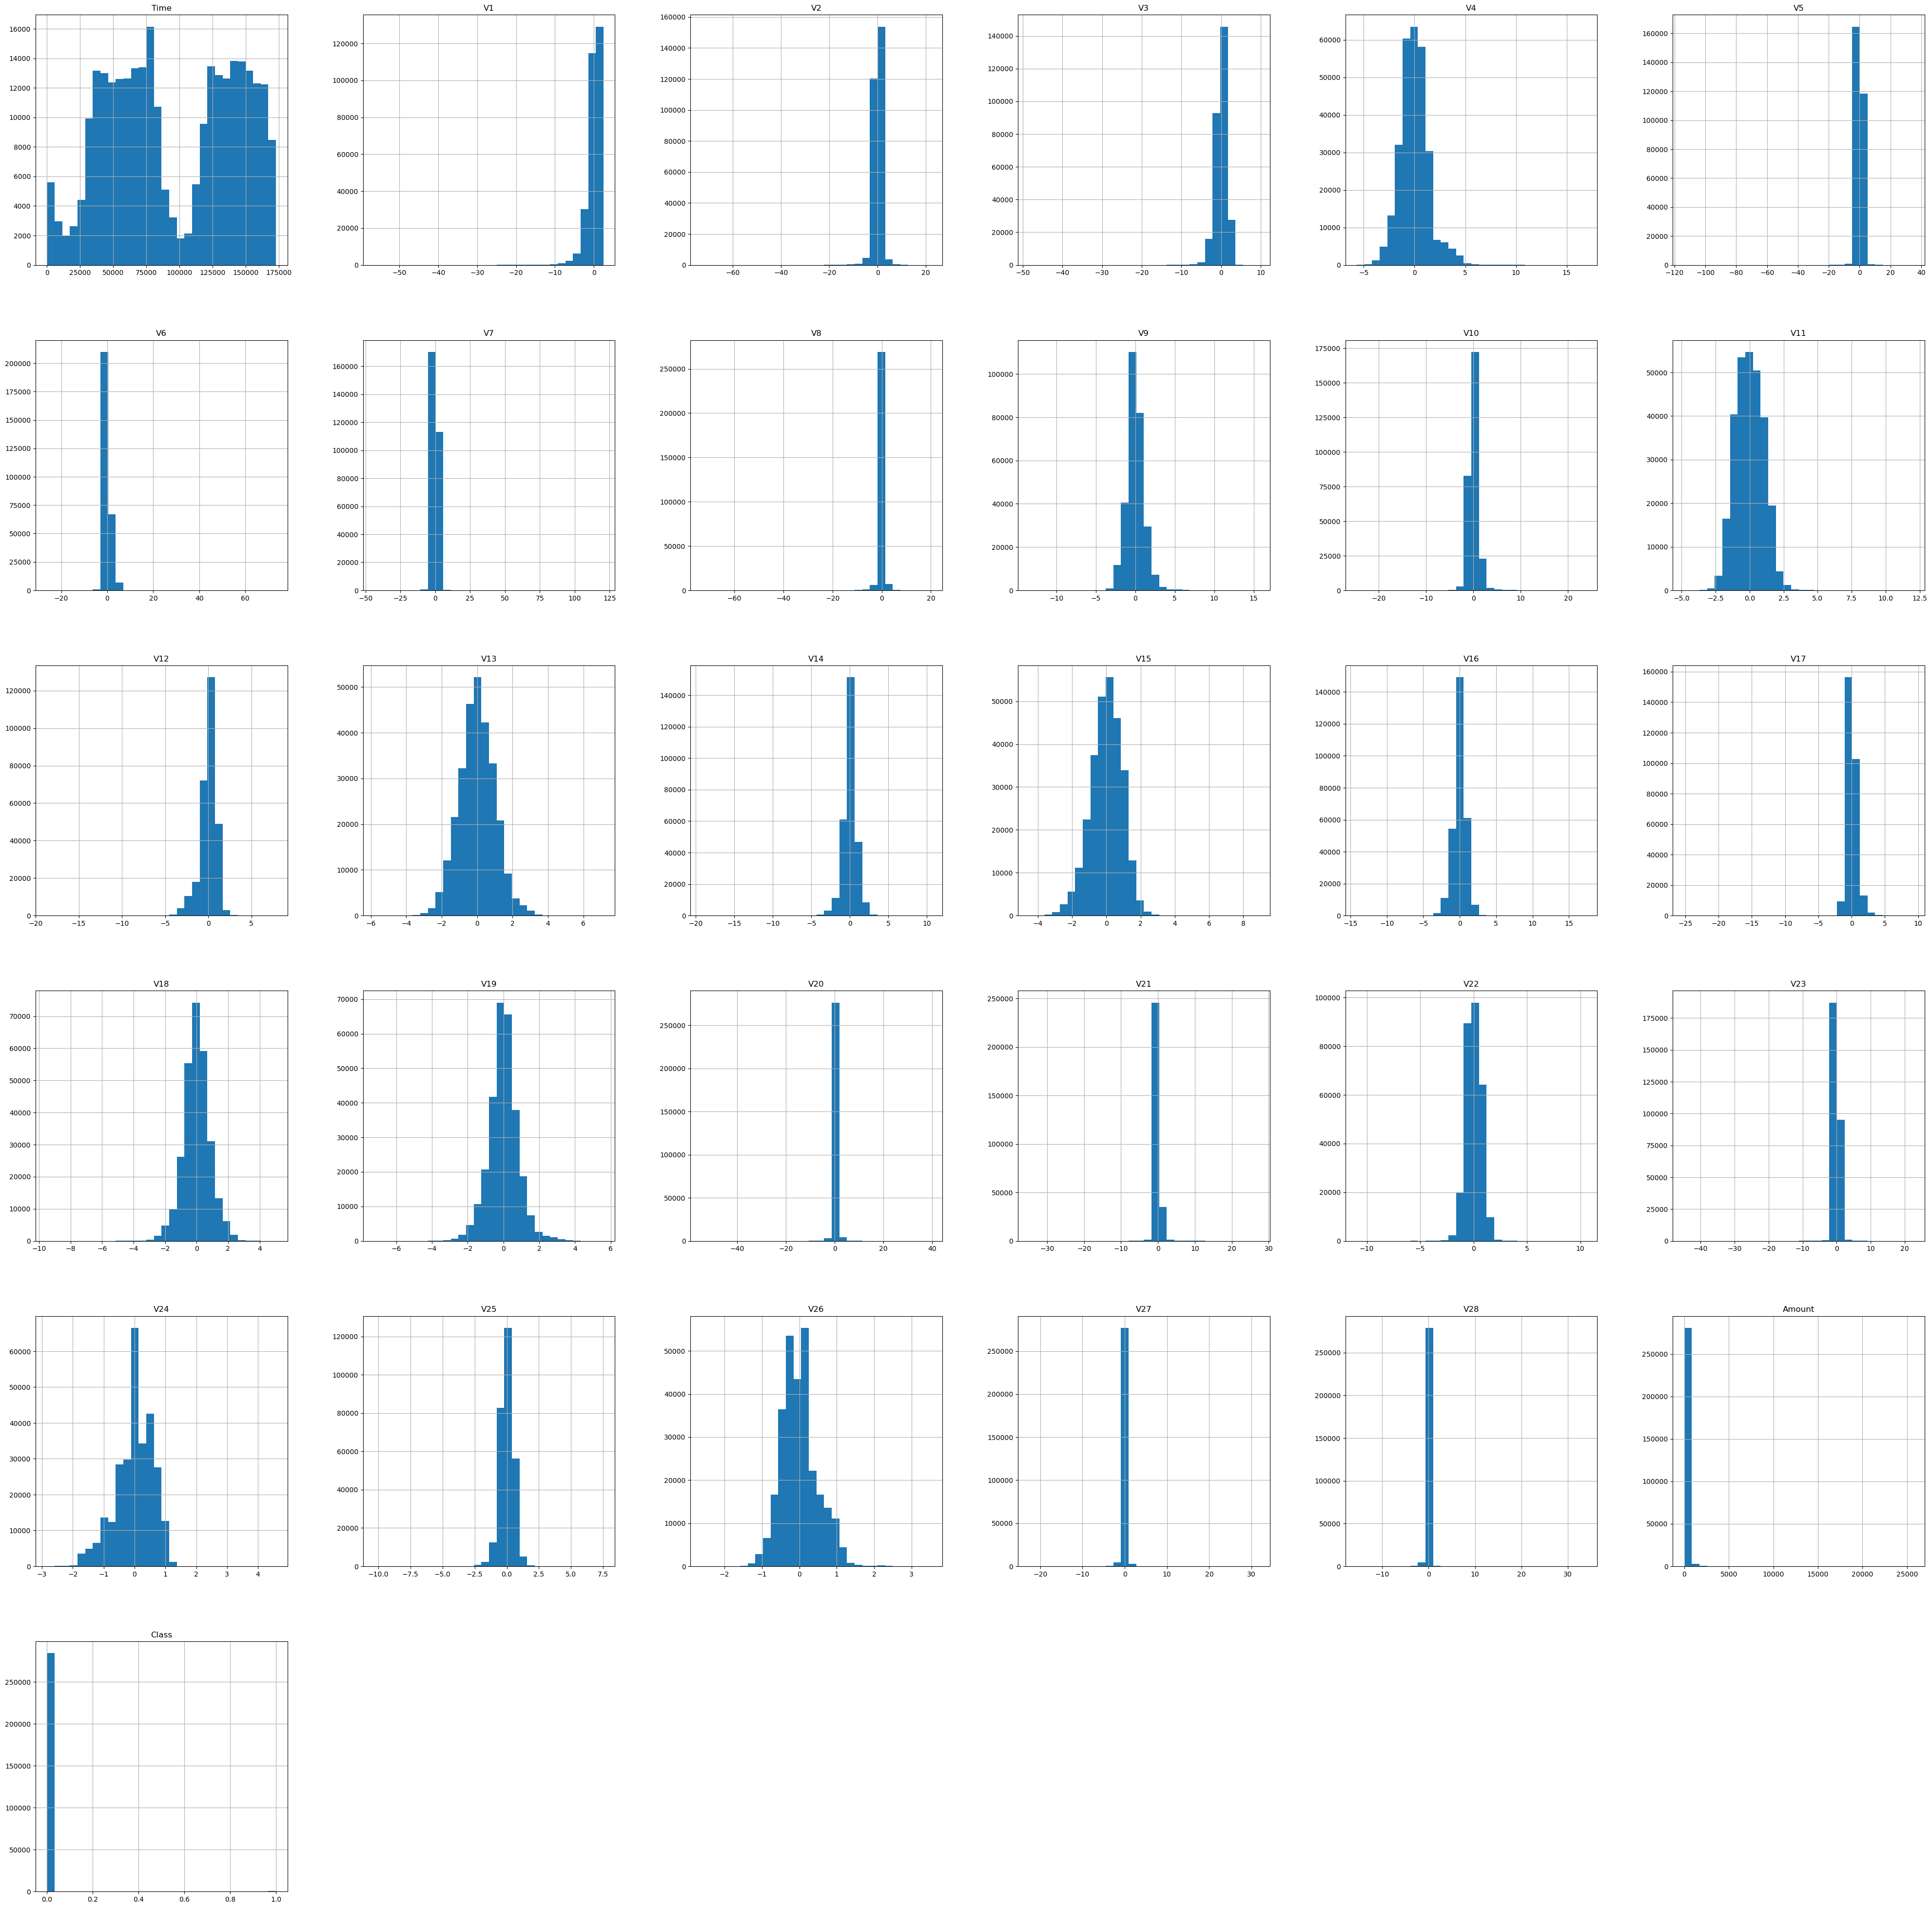

In [116]:
credit_card_data.hist(bins=30,figsize=(50,50))

This Dataset is highly unblanced

0-> Normal Transaction
1->fraudulent transaction

In [69]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [70]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [71]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [72]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [73]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transaction and fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [74]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [75]:
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [76]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162269,114975.0,-6.697569,4.179960,-4.866476,-0.626586,-3.024024,-1.324855,-0.835983,2.692196,1.844012,...,0.035932,0.852066,0.245004,1.155756,0.098178,-0.214949,0.996161,1.252345,99.99,0
133050,80221.0,-1.340330,1.654016,0.421844,-0.332015,-0.305351,0.464076,-0.412459,-1.866498,-0.566925,...,2.333569,-0.798456,0.237542,-0.537227,-0.401932,0.206405,0.121040,0.081700,50.00,0
51952,45207.0,1.502139,-1.034071,-0.164479,-1.464295,-0.931323,-0.313071,-0.752496,-0.145446,-2.079425,...,-0.188598,-0.079854,-0.201944,-0.325133,0.744709,-0.042057,0.010374,-0.004018,31.70,0
265122,161749.0,2.031244,-0.088120,-2.730475,-0.132888,1.500659,0.217672,0.592498,-0.034771,-0.198055,...,0.334885,1.191601,-0.162969,-1.537674,0.427094,1.133613,-0.106968,-0.127060,2.00,0
281992,170581.0,-0.263396,1.292600,-0.304827,-0.489152,0.756304,-1.063000,1.049182,-0.319658,-0.050608,...,-0.249649,-0.652849,0.189349,1.072378,-0.468981,0.042441,-0.177006,0.092102,4.49,0


In [77]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [78]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95172.463415,-0.082665,-0.059345,0.011507,0.054404,0.038318,-0.059369,-0.052353,-0.086837,-0.049797,...,0.084272,-0.032906,0.023393,0.009085,0.005027,-0.040875,-0.009070,0.011429,0.014210,98.693841
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [79]:
X = new_dataset.drop(columns='Class',axis=1)
Y = new_dataset['Class']

In [80]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
162269  114975.0 -6.697569  4.179960 -4.866476 -0.626586 -3.024024 -1.324855   
133050   80221.0 -1.340330  1.654016  0.421844 -0.332015 -0.305351  0.464076   
51952    45207.0  1.502139 -1.034071 -0.164479 -1.464295 -0.931323 -0.313071   
265122  161749.0  2.031244 -0.088120 -2.730475 -0.132888  1.500659  0.217672   
281992  170581.0 -0.263396  1.292600 -0.304827 -0.489152  0.756304 -1.063000   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [81]:
print(Y)

162269    0
133050    0
51952     0
265122    0
281992    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [101]:
cols = list(X.columns.values)

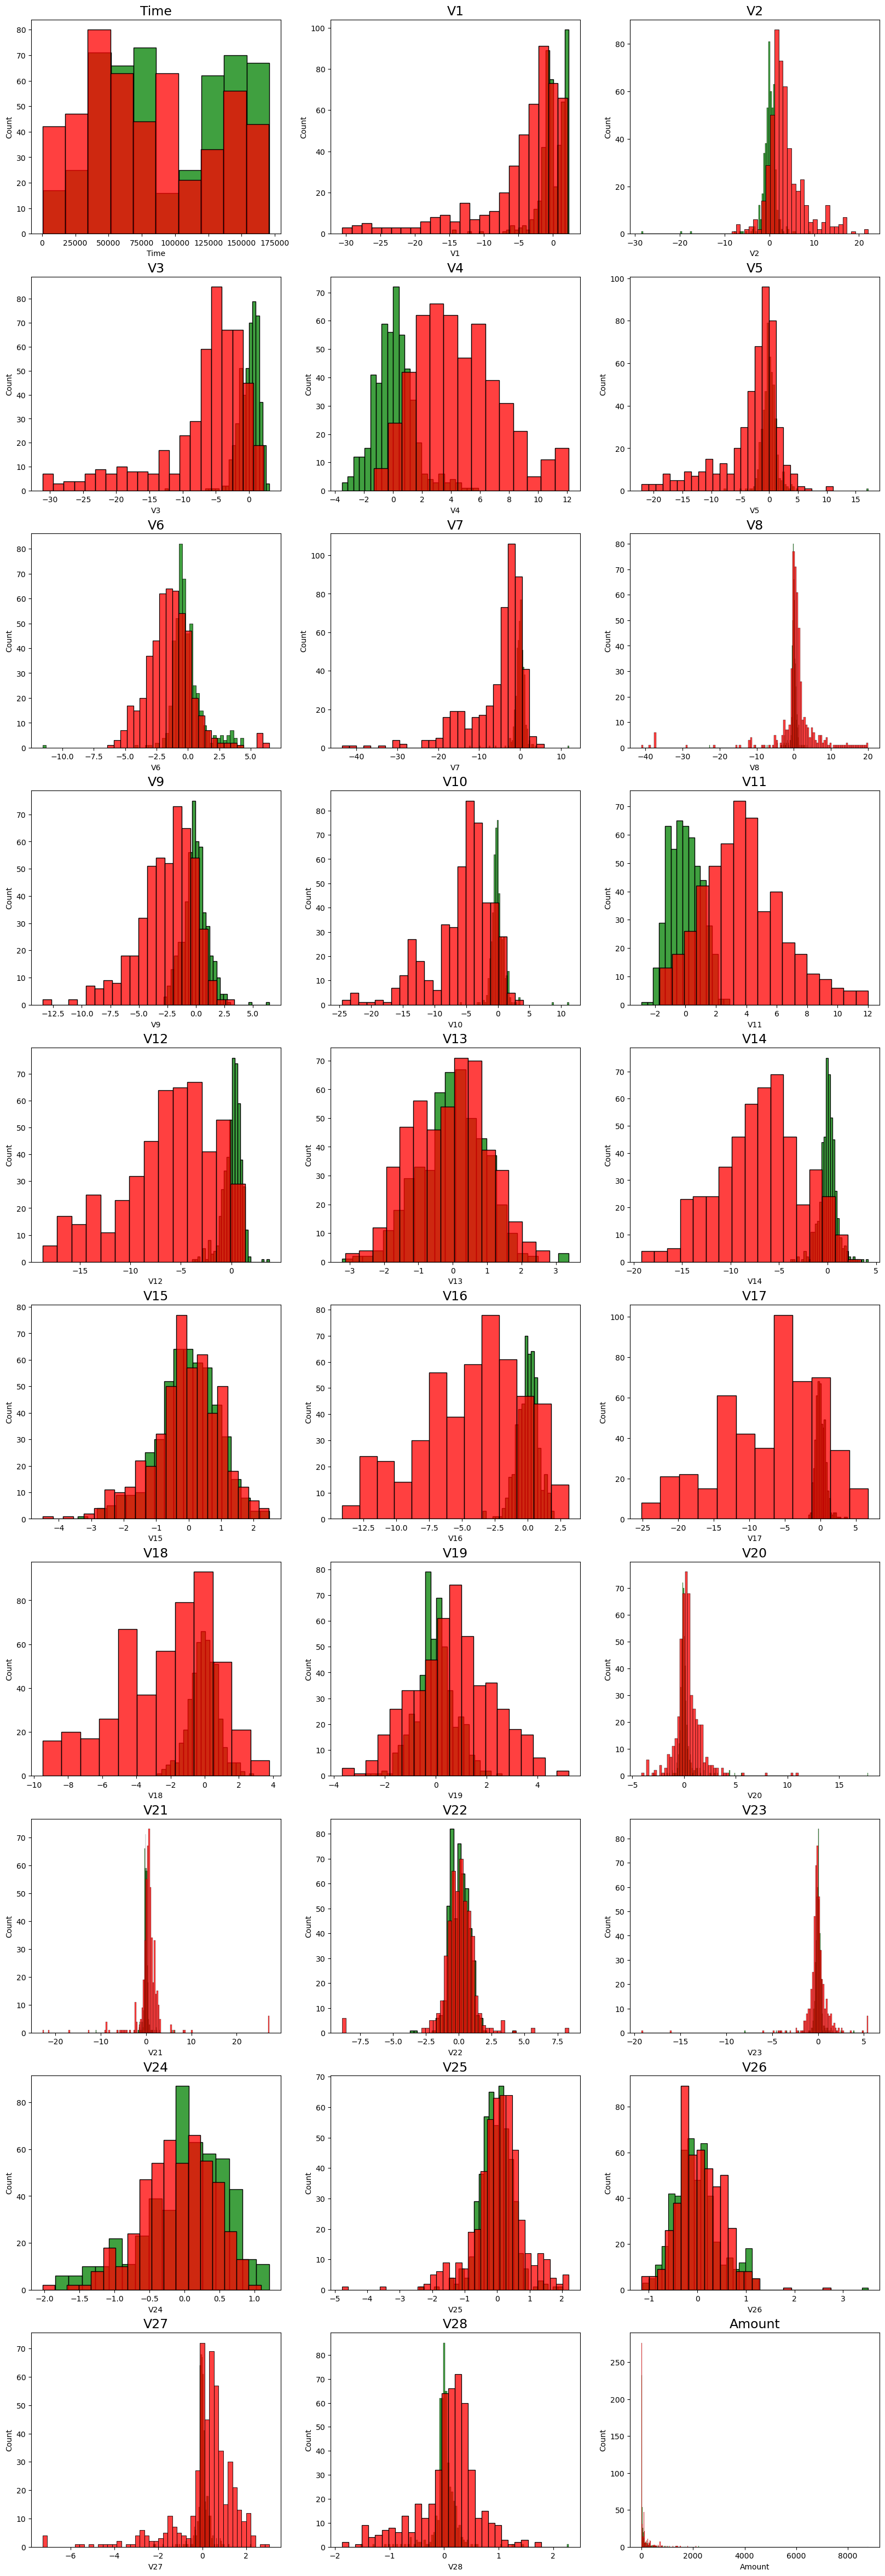

In [115]:
#plot the histogram of a variable from the dataset to see the skewness
import matplotlib.pyplot as plt
import seaborn as sns

normal_records = new_dataset.Class == 0
fraud_records = new_dataset.Class == 1

plt.figure(figsize=(20,60))
for n,col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.histplot(X[col][normal_records],color='green')
    sns.histplot(X[col][fraud_records],color='red')
    plt.title(col,fontsize=17)
plt.show()

In [108]:
normal_records.shape

(984,)

Split the data into Training data & Testing Data

In [82]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)

In [83]:
print(X.shape,x_train.shape,x_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

In [84]:
model = LogisticRegression()

In [85]:
model.fit(x_train,y_train)

LogisticRegression()

In [86]:
#accuracy on training data
x_train_prediction = model.predict(x_train)

In [87]:
training_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy score of training data: ',training_data_accuracy)

Accuracy score of training data:  0.9390088945362135


In [95]:
precision = precision_score(y_train,x_train_prediction)
print('Precision: %f' % precision)

Precision: 0.962567


In [99]:
f1 = f1_score(y_train,x_train_prediction)
print('F1 score: %f' % f1)

F1 score: 0.937500


In [100]:
recall = recall_score(y_train,x_train_prediction)
print('Recall: %f' % recall)

Recall: 0.913706


In [88]:
# accuracy on test data
x_test_prediction = model.predict(x_test)

In [89]:
print(x_test_prediction)

[1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0
 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]


In [90]:
test_data_accuracy = accuracy_score(y_test,x_test_prediction)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.9137055837563451


In [92]:
precision = precision_score(y_test,x_test_prediction)
print('Precision: %f' % precision)

Precision: 0.926316


In [93]:
f1 = f1_score(y_test,x_test_prediction)
print('F1 score: %f' % f1)

F1 score: 0.911917


In [94]:
recall = recall_score(y_test,x_test_prediction)
print('Recall: %f' % recall)

Recall: 0.897959
